#### 현재 scikit-learn 버전 확인해서 0.18인 경우는 Density Estimation 쪽에서 주석이 되어 있는 쪽으로 사용 

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
print('scikit-learn version', sklearn.__version__)

('scikit-learn version', '0.17')


#### Download pre-processed MNIST
- 원본 파일을 미리 다운로드 받아서 python numpy 형태로 전처리를 해둠
- 원본 파일은 아래 링크에서 다운로드가 가능
  - http://yann.lecun.com/exdb/mnist/

In [58]:
import os
import pickle
os.system('wget cvlab.postech.ac.kr/~tackgeun/mnist.pkl.gz') # download a dataset
os.system('gunzip mnist.pkl.gz') # unzip the dataset
dataset = pickle.load(open("mnist.pkl", "rb")) # load the dataset

### MNIST

#### dataset은 train과 test로 나누어져 있으며, 각각 이미지와 레이블을 갖고 있다. 

In [61]:
print(dataset.keys())
print(dataset['train'].keys())
print(dataset['test'].keys())

['test', 'train']
['image', 'label']
['image', 'label']


#### 데이터는 numpy array 형태로 들어가있으며, train set은 60000개, test set은 10000개의 sample로 구성되어 있다.

In [64]:
print(dataset['train']['image'].shape)
print(dataset['train']['label'].shape)
print(dataset['test']['image'].shape)
print(dataset['test']['label'].shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


#### Image는 28 by 28 픽셀의 해상도를 갖고, 이를 vector로 표현하여 28*28=784의 dimension을 갖는다.
#### 각 픽셀은 0~255(8-bit)의 크기를 갖는 grayscale 값이다.

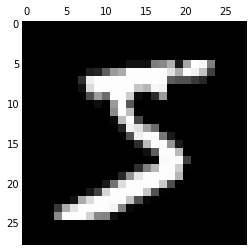

In [88]:
X_train = dataset['train']['image']
temp_image = np.reshape(X_train[0, :], newshape=(28,28))
plt.matshow(temp_image, cmap='gray')

#### label은 숫자 데이터셋이므로 0,1,2,3,4,5,6,7,8,9로 10개가 존재한다.

In [93]:
y_train = dataset['train']['label']
y_test = dataset['test']['label']
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


## Density Estimation of 'Digit 8 in MNIST' using Mixture of Gaussian with $k=5$
- http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

- n_components는 Gaussian distribution의 갯수
- covariance_type은 covanriance matrix의 형태를 알려줍니다. 위의 도큐먼트 참고.

In [163]:
from sklearn import mixture
#gmm = mixture.GaussianMixture(n_components=5, covariance_type='full') # for version 0.18
gmm = mixture.GMM(n_components=5, covariance_type='full') # for version 0.17

digit_8 = X_train[y_train == 8][:] # get samples of digit 8
gmm.fit(digit_8) # estimate density from samples

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=5, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

#### randomly generate the samples from estimated density function 

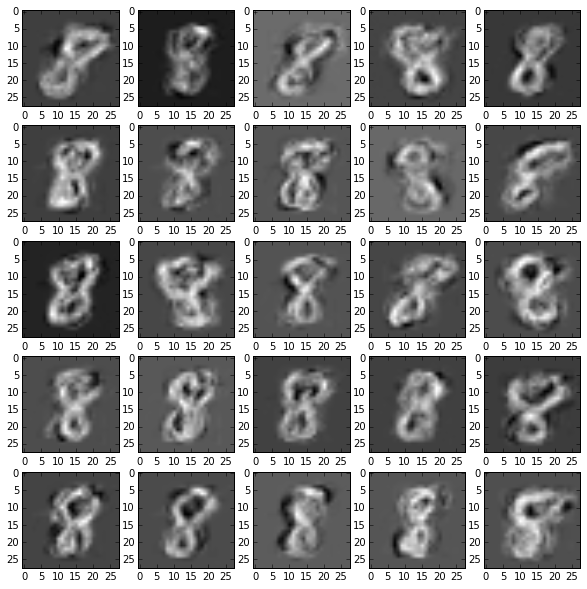

In [164]:
nSamples = 25
samples_8_vector = gmm.sample(nSamples)
samples_8 = np.reshape(samples_8_vector, newshape=(nSamples,28,28))

fig = plt.figure(figsize=(10,10))
for idx in range(0, nSamples):
    ax = fig.add_subplot(5, 5, idx+1)
    ax.imshow(samples_8[idx], cmap='gray')

#### Mixing parameter of Mixture of Gaussian
#### Component density(Gaussian)'s mean 
#### Component density's covariance

In [165]:
print(gmm.weights_, gmm.weights_.shape)
print(gmm.means_, gmm.means_.shape)
#print(gmm.covariances_, gmm.covariances_.shape) # for scikit-learn version 0.18
print(gmm.covars_, gmm.covars_.shape)

(array([ 0.11844129,  0.10374295,  0.099812  ,  0.15740899,  0.52059477]), (5,))
(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), (5, 784))
(array([[[ 0.001,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.001,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.001, ...,  0.   ,  0.   ,  0.   ],
        ..., 
        [ 0.   ,  0.   ,  0.   , ...,  0.001,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.001,  0.   ],
        [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.001]],

       [[ 0.001,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.001,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.001, ...,  0.   ,  0.   ,  0.   ],
        ..., 
        [ 0.   ,  0.   ,  0.   , ...,  0.001,  0.   ,  0.   ],
        [ 0.   ,  0.   , 

#### 각 Cluster 별로 Sampling
- 각 Cluster는 Gaussian distribution이기 때문에, Multivariate Gaussian Distribution에서 Sampling하는 함수를 사용하면 된다.

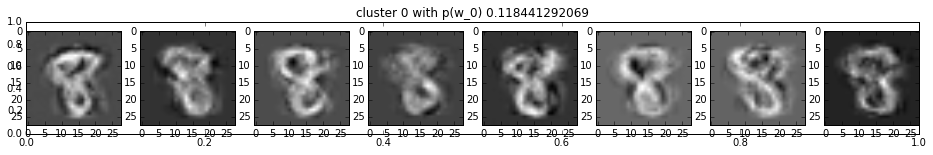

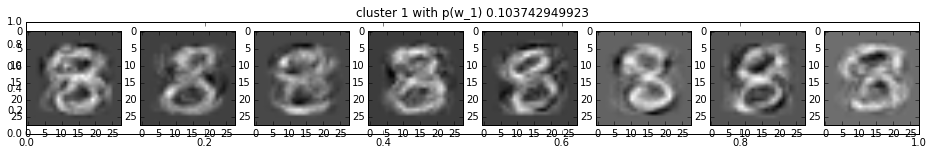

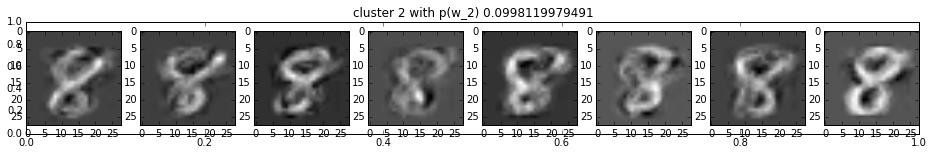

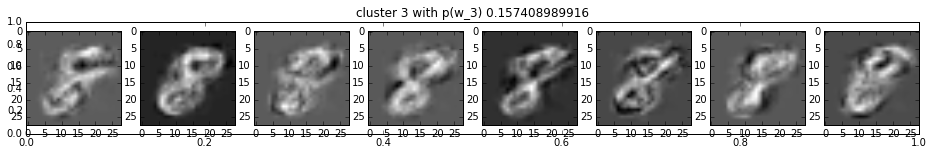

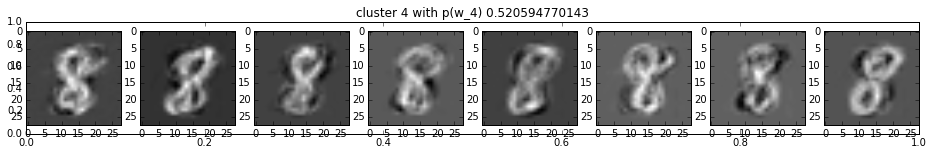

In [175]:
for kidx in range(0, 5):
    nSamples = 8
    samples_8_vector = np.random.multivariate_normal(mean=gmm.means_[kidx], cov=gmm.covars_[kidx], size=nSamples)
    samples_8 = np.reshape(samples_8_vector, newshape=(nSamples,28,28))
    fig = plt.figure(figsize=(16,2))
    plt.title('cluster ' + str(kidx) + ' with p(w_' + str(kidx) +') ' + str(gmm.weights_[kidx]))
    for idx in range(0, nSamples):
        ax = fig.add_subplot(1, 8, idx+1)
        ax.imshow(samples_8[idx], cmap='gray')
    plt.show

## Classification using Random Forest on MNIST
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [181]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=3, criterion = 'entropy', n_estimators = 100, random_state = 1, n_jobs = 2)

X_train = dataset['train']['image']
y_train = dataset['train']['label']
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [182]:
X_test = dataset['test']['image']
y_test = dataset['test']['label']
y_pred = forest.predict(X_test)

화요일에 작성했던 get_stats 함수의 기능을 업그레이드!
- train accuracy
- test accuracy
  - accuracy = (맞춘 갯수) / (전체 갯수)
- 수행 속도
- test set의 confusion matrix
  - 10 x 10의 matrix를 뱉어주면 된다.

In [183]:
def get_stats(X_train, X_test, y_train, y_test, classifier):

    import time
    t = time.time()
    z_train = classifier.predict(X_train)
    z_test = classifier.predict(X_test)
    speed = time.time() - t
        
    accuracy_train = # calculate this one
    accuracy_test =  # calculate this one
        
    confusion = np.zeros((10,10))
    for pair in zip(y_test, z_test):
        # write here
    
    return accuracy_train, accuracy_test, confusion, speed

(0.75009999999999999, 0.76239999999999997, 0.8544919490814209)


<matplotlib.colorbar.Colorbar instance at 0x7f0a8b0aeef0>

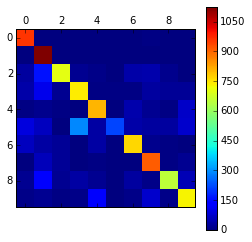

In [184]:
acc_train, acc_test, confusion, speed = get_stats(X_train,X_test,y_train,y_test,forest)
print(acc_train,acc_test,speed)
plt.matshow(confusion)
plt.colorbar()

### 최대의 성능을 달성해봅시다!!!